In [458]:
import pandas as pd
import numpy as np
#from abc import ABC, abstractmethod
import matplotlib.pyplot as plt
import scipy.stats as stats
plt.style.use('ggplot')

In [248]:
#read the csv into a pandas dataframe
df = pd.read_csv('/Users/raffi/Desktop/galvanize/capstone_1/data/games.csv', delimiter = ',')

In [249]:
#get the information about the dataframe - 20,058 rows
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20058 entries, 0 to 20057
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              20058 non-null  object 
 1   rated           20058 non-null  bool   
 2   created_at      20058 non-null  float64
 3   last_move_at    20058 non-null  float64
 4   turns           20058 non-null  int64  
 5   victory_status  20058 non-null  object 
 6   winner          20058 non-null  object 
 7   increment_code  20058 non-null  object 
 8   white_id        20058 non-null  object 
 9   white_rating    20058 non-null  int64  
 10  black_id        20058 non-null  object 
 11  black_rating    20058 non-null  int64  
 12  moves           20058 non-null  object 
 13  opening_eco     20058 non-null  object 
 14  opening_name    20058 non-null  object 
 15  opening_ply     20058 non-null  int64  
dtypes: bool(1), float64(2), int64(4), object(9)
memory usage: 2.3+ MB


In [250]:
#find the unique identifier, which is 'id'
df['id'].unique().shape

(19113,)

In [251]:
#determine if 'id' is truly unique, look for duplicate values
df['id'].value_counts()

XRuQPSzH    5
QurxyQkA    4
I8odmGjb    4
nyYULwUl    4
o4T7dj5h    4
           ..
yTezA1Rw    1
JaKrsAgH    1
lvJcvlpo    1
8VfmTTJV    1
GIgJ3SIm    1
Name: id, Length: 19113, dtype: int64

In [252]:
#dropping duplicated ids in dataframe
df.drop_duplicates(subset = ['id'], inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19113 entries, 0 to 20057
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              19113 non-null  object 
 1   rated           19113 non-null  bool   
 2   created_at      19113 non-null  float64
 3   last_move_at    19113 non-null  float64
 4   turns           19113 non-null  int64  
 5   victory_status  19113 non-null  object 
 6   winner          19113 non-null  object 
 7   increment_code  19113 non-null  object 
 8   white_id        19113 non-null  object 
 9   white_rating    19113 non-null  int64  
 10  black_id        19113 non-null  object 
 11  black_rating    19113 non-null  int64  
 12  moves           19113 non-null  object 
 13  opening_eco     19113 non-null  object 
 14  opening_name    19113 non-null  object 
 15  opening_ply     19113 non-null  int64  
dtypes: bool(1), float64(2), int64(4), object(9)
memory usage: 2.4+ MB


In [253]:
#update moves column from string to list for future analysis
df.moves = df.moves.apply(lambda x: x.split(' '))

In [254]:
df_2['moves'][0]

['d4',
 'd5',
 'c4',
 'c6',
 'cxd5',
 'e6',
 'dxe6',
 'fxe6',
 'Nf3',
 'Bb4+',
 'Nc3',
 'Ba5',
 'Bf4']

In [255]:
df['increment_code'].value_counts()

10+0     7356
15+0     1258
15+15     821
5+5       723
5+8       678
         ... 
30+45       1
16+3        1
3+30        1
10+35       1
4+12        1
Name: increment_code, Length: 400, dtype: int64

In [256]:
#categorizing according to time format
df['game_time'] = df['increment_code'].str.split('+').str[0].astype(int)
df['increment'] = df['increment_code'].str.split('+').str[1].astype(int)
df['game_time'].value_counts()

10     8987
15     3219
5      1748
20      902
8       888
30      712
7       600
25      309
9       249
12      218
6       171
180     147
45      144
11       96
60       95
13       70
4        65
14       63
3        56
2        52
16       48
0        40
40       36
17       36
1        31
19       27
90       26
35       26
18       26
120      12
150      11
29        2
21        1
Name: game_time, dtype: int64

In [233]:
#creating new column for game_category (to be used in next step)
#df['game_category'] = ''

In [305]:
df['game_time'].value_counts()

10     8987
15     3219
5      1748
20      902
8       888
30      712
7       600
25      309
9       249
12      218
6       171
180     147
45      144
11       96
60       95
13       70
4        65
14       63
3        56
2        52
16       48
0        40
40       36
17       36
1        31
19       27
90       26
35       26
18       26
120      12
150      11
29        2
21        1
Name: game_time, dtype: int64

In [349]:
#categorizing games by time increments - rapid, blitz, bullet, classical
def game_category(val):
    if val <= 3:
        return 'bullet'
    elif val <= 10:
        return 'blitz'
    elif val < 60:
        return 'rapid'
    elif val >= 60:
        return 'classical'
    else:
        return 'other'

In [350]:
df['game_category'] = df['game_time'].apply(game_category)
df['game_category'].value_counts()

blitz        12708
rapid         5935
classical      291
bullet         179
Name: game_category, dtype: int64

In [351]:
#testing game_category function
m = df['game_category'] == 'classical'
mask = df[m]
mask.describe()

,created_at,last_move_at,turns,white_rating,black_rating,opening_ply,game_time,increment
count,2.910000e+02,2.910000e+02,291.000000,291.000000,291.000000,291.000000,291.000000,291.000000
mean,1.470157e+12,1.470161e+12,47.353952,1475.841924,1439.353952,4.000000,129.175258,46.786942
std,3.247106e+10,3.246586e+10,34.825008,335.816867,298.284073,2.897085,55.086204,73.883291
min,1.388763e+12,1.388763e+12,1.000000,856.000000,840.000000,1.000000,60.000000,0.000000
25%,1.453930e+12,1.453930e+12,18.000000,1255.000000,1250.000000,2.000000,60.000000,0.000000
50%,1.478930e+12,1.478930e+12,44.000000,1452.000000,1456.000000,3.000000,180.000000,0.000000
75%,1.496727e+12,1.496727e+12,68.000000,1631.000000,1585.500000,5.000000,180.000000,60.000000
max,1.504406e+12,1.504412e+12,168.000000,2619.000000,2500.000000,19.000000,180.000000,180.000000


In [353]:
df.describe()

,created_at,last_move_at,turns,white_rating,black_rating,opening_ply,game_time,increment
count,1.911300e+04,1.911300e+04,19113.000000,19113.000000,19113.000000,19113.000000,19113.000000,19113.000000
mean,1.483413e+12,1.483414e+12,60.513839,1597.300005,1590.045519,4.815780,13.785277,5.146497
std,2.833975e+10,2.833964e+10,33.488264,290.022740,290.441694,2.798283,17.072447,13.808620
min,1.376772e+12,1.376772e+12,1.000000,784.000000,789.000000,1.000000,0.000000,0.000000
25%,1.476910e+12,1.476912e+12,37.000000,1401.000000,1394.000000,3.000000,10.000000,0.000000
50%,1.495670e+12,1.495670e+12,55.000000,1567.000000,1563.000000,4.000000,10.000000,0.000000
75%,1.503080e+12,1.503080e+12,79.000000,1792.000000,1785.000000,6.000000,15.000000,7.000000
max,1.504493e+12,1.504494e+12,349.000000,2700.000000,2723.000000,28.000000,180.000000,180.000000


In [410]:
white_rating_dist = stats.norm(df.white_rating.mean(), df.white_rating.std())
black_rating_dist = stats.norm(df.black_rating.mean(), df.black_rating.std())

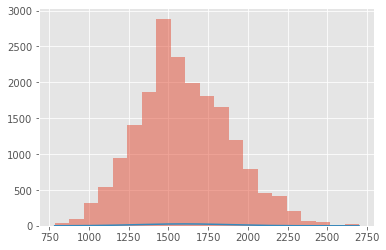

In [383]:
fig, ax = plt.subplots(1,1, figsize = (6,4))
bins = 21
plt.hist(df.white_rating, bins, alpha = 0.5)



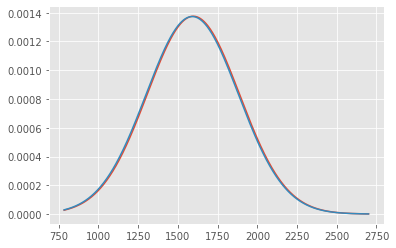

In [411]:
fig, ax = plt.subplots(1,1)
x = np.linspace(df.white_rating.min(), df.white_rating.max(), 501)
plt.plot(x, white_rating_dist.pdf(x))
plt.plot(x, black_rating_dist.pdf(x))

In [404]:
white_rating_dist.pdf(1597)*df.white_rating.size

26.29097197979634

In [402]:
df.white_rating.mean(), df.white_rating.var(), df.white_rating.std()

(1597.300005232041, 84113.18960705382, 290.02273981026696)

In [412]:
df.black_rating.mean(), df.black_rating.var(), df.black_rating.std()

(1590.045518756867, 84356.37789863265, 290.4416944907061)

In [413]:
df.head(3)

,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply,game_time,increment,game_category
0,TZJHLljE,False,1.504210e+12,1.504210e+12,13,outoftime,white,15+2,bourgris,1500,a-00,1191,"[d4, d5, c4, c6, cxd5, e6, dxe6, fxe6, Nf3, Bb...",D10,Slav Defense: Exchange Variation,5,15,2,rapid
1,l1NXvwaE,True,1.504130e+12,1.504130e+12,16,resign,black,5+10,a-00,1322,skinnerua,1261,"[d4, Nc6, e4, e5, f4, f6, dxe5, fxe5, fxe5, Nx...",B00,Nimzowitsch Defense: Kennedy Variation,4,5,10,blitz
2,mIICvQHh,True,1.504130e+12,1.504130e+12,61,mate,white,5+10,ischia,1496,a-00,1500,"[e4, e5, d3, d6, Be3, c6, Be2, b5, Nd2, a5, a4...",C20,King's Pawn Game: Leonardis Variation,3,5,10,blitz


In [419]:
#categorize rating scales
def rating_category(val):
    if val < 800:
        return 'G'
    elif val < 1000:
        return 'F'
    elif val < 1200:
        return 'E'
    elif val < 1400:
        return 'D'
    elif val < 1600:
        return 'C'
    elif val < 1800:
        return 'B'
    elif val < 2000:
        return 'A'
    elif val < 2200:
        return 'Expert'
    elif val < 2400:
        return 'NM'
    elif val > 2400:
        return 'SM'

In [417]:
df['white_rating_cat'] = df['white_rating'].apply(rating_category)
df['black_rating_cat'] = df['black_rating'].apply(rating_category)

In [418]:
df.head(3)

,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,...,black_rating,moves,opening_eco,opening_name,opening_ply,game_time,increment,game_category,white_rating_cat,black_rating_cat
0,TZJHLljE,False,1.504210e+12,1.504210e+12,13,outoftime,white,15+2,bourgris,1500,...,1191,"[d4, d5, c4, c6, cxd5, e6, dxe6, fxe6, Nf3, Bb...",D10,Slav Defense: Exchange Variation,5,15,2,rapid,C,E
1,l1NXvwaE,True,1.504130e+12,1.504130e+12,16,resign,black,5+10,a-00,1322,...,1261,"[d4, Nc6, e4, e5, f4, f6, dxe5, fxe5, fxe5, Nx...",B00,Nimzowitsch Defense: Kennedy Variation,4,5,10,blitz,D,D
2,mIICvQHh,True,1.504130e+12,1.504130e+12,61,mate,white,5+10,ischia,1496,...,1500,"[e4, e5, d3, d6, Be3, c6, Be2, b5, Nd2, a5, a4...",C20,King's Pawn Game: Leonardis Variation,3,5,10,blitz,C,C


In [420]:
df['rating_differential'] = abs(df['white_rating'] - df['black_rating'])

In [421]:
df.head(3)

,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,...,moves,opening_eco,opening_name,opening_ply,game_time,increment,game_category,white_rating_cat,black_rating_cat,rating_differential
0,TZJHLljE,False,1.504210e+12,1.504210e+12,13,outoftime,white,15+2,bourgris,1500,...,"[d4, d5, c4, c6, cxd5, e6, dxe6, fxe6, Nf3, Bb...",D10,Slav Defense: Exchange Variation,5,15,2,rapid,C,E,309
1,l1NXvwaE,True,1.504130e+12,1.504130e+12,16,resign,black,5+10,a-00,1322,...,"[d4, Nc6, e4, e5, f4, f6, dxe5, fxe5, fxe5, Nx...",B00,Nimzowitsch Defense: Kennedy Variation,4,5,10,blitz,D,D,61
2,mIICvQHh,True,1.504130e+12,1.504130e+12,61,mate,white,5+10,ischia,1496,...,"[e4, e5, d3, d6, Be3, c6, Be2, b5, Nd2, a5, a4...",C20,King's Pawn Game: Leonardis Variation,3,5,10,blitz,C,C,4


In [437]:
df.winner.value_counts()

white    9545
black    8680
draw      888
Name: winner, dtype: int64

Text(0, 0.5, 'black rating')

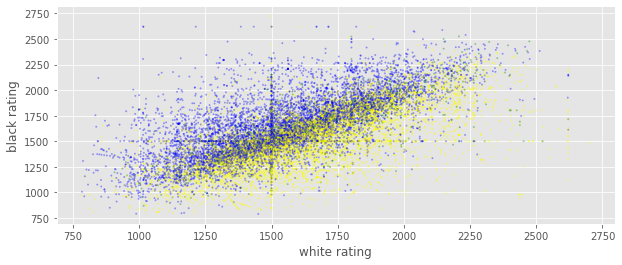

In [631]:
fig, ax = plt.subplots(1,1, figsize = (10,4))
colors = {'white': 'yellow', 'black': 'blue', 'draw': 'green'}
color = ['yellow', 'blue', 'green']
ax.scatter(df.white_rating, df.black_rating, s = 2, c = df.winner.map(colors), label = colors, alpha = 0.3)
ax.set_xlabel('white rating')
ax.set_ylabel('black rating')

#how to get legend to be color of dot + label like white, blue, grey

In [459]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19113 entries, 0 to 20057
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   19113 non-null  object 
 1   rated                19113 non-null  bool   
 2   created_at           19113 non-null  float64
 3   last_move_at         19113 non-null  float64
 4   turns                19113 non-null  int64  
 5   victory_status       19113 non-null  object 
 6   winner               19113 non-null  object 
 7   increment_code       19113 non-null  object 
 8   white_id             19113 non-null  object 
 9   white_rating         19113 non-null  int64  
 10  black_id             19113 non-null  object 
 11  black_rating         19113 non-null  int64  
 12  moves                19113 non-null  object 
 13  opening_eco          19113 non-null  object 
 14  opening_name         19113 non-null  object 
 15  opening_ply          19113 non-null 

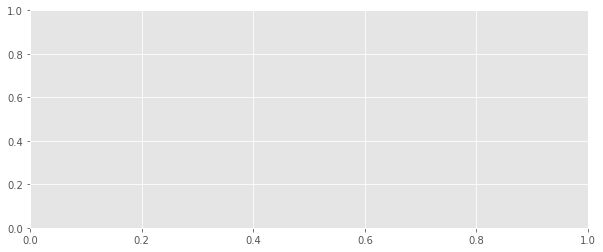

In [535]:
#openings = df.groupby('opening_name').agg({'turns': 'mean', 'opening_name': 'count'})
openings = df['opening_name'].value_counts()
x = np.linspace(df['opening_name'].value_counts().max(), df['opening_name'].value_counts().min())
fig, ax = plt.subplots(1,1, figsize = (10,4))


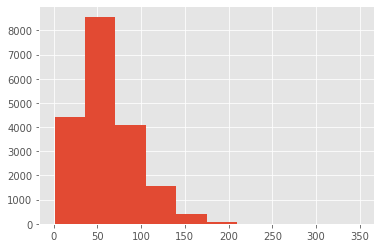

In [549]:
df['turns'].hist();

In [551]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19113 entries, 0 to 20057
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   19113 non-null  object 
 1   rated                19113 non-null  bool   
 2   created_at           19113 non-null  float64
 3   last_move_at         19113 non-null  float64
 4   turns                19113 non-null  int64  
 5   victory_status       19113 non-null  object 
 6   winner               19113 non-null  object 
 7   increment_code       19113 non-null  object 
 8   white_id             19113 non-null  object 
 9   white_rating         19113 non-null  int64  
 10  black_id             19113 non-null  object 
 11  black_rating         19113 non-null  int64  
 12  moves                19113 non-null  object 
 13  opening_eco          19113 non-null  object 
 14  opening_name         19113 non-null  object 
 15  opening_ply          19113 non-null 

In [563]:
white_wins = np.where(df['winner'] == 'white')
white_wins

(array([    0,     2,     3, ..., 19108, 19110, 19111]),)

In [564]:
np.sum(df['winner'] == 'white')

9545

In [ ]:
x = df.groupby(['opening_name', 'winner'])['winner'].count().sort_values(ascending = False)
x[0:10]

In [612]:
df.groupby(['opening_name'])['opening_name'].count().sort_values(ascending = False)

342

In [637]:
openings = df['opening_name'].value_counts()
openings

Sicilian Defense                                                           349
Van't Kruijs Opening                                                       342
Sicilian Defense: Bowdler Attack                                           290
French Defense: Knight Variation                                           260
Scotch Game                                                                254
                                                                          ... 
Nimzo-Indian Defense: Romanishin Variation #2                                1
Benoni Defense: Classical Variation |  Main Line                             1
Sicilian Defense: Smith-Morra Gambit Declined |  Scandinavian Formation      1
King's Pawn Opening: Speers                                                  1
Sicilian Defense: Dragon Variation |  Fianchetto Variation                   1
Name: opening_name, Length: 1477, dtype: int64

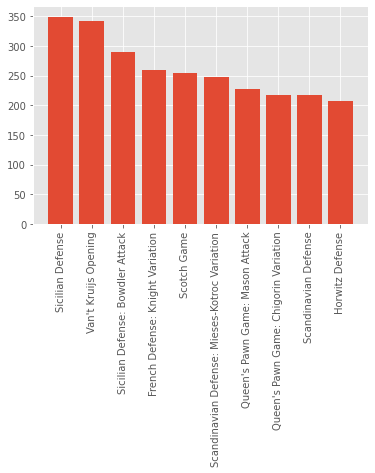

In [629]:
fig, ax = plt.subplots(1,1)
ax.bar(openings.index[:10], openings[:10])
plt.xticks(rotation = 90);

In [638]:
white_wins_filter = df['winner'] == 'white'
black_wins_filter = df['winner'] == 'black'
draw_filter = df['winner'] == 'draw'

In [649]:
openings = df[['opening_name', 'winner']].apply(pd.value_counts)
openings

,opening_name,winner
Alekhine Defense,43.0,NaN
Alekhine Defense #2,3.0,NaN
Alekhine Defense #3,1.0,NaN
Alekhine Defense: Balogh Variation,1.0,NaN
Alekhine Defense: Brooklyn Variation,2.0,NaN
...,...,...
Zukertort Opening: Vos Gambit,3.0,NaN
Zukertort Opening: Wade Defense,1.0,NaN
black,NaN,8680.0
draw,NaN,888.0


In [705]:
openings = df.groupby(['opening_name', 'winner'])['id'].count()
openings = pd.DataFrame(openings).reset_index()

In [706]:
openings

,opening_name,winner,id
0,Alekhine Defense,black,20
1,Alekhine Defense,draw,2
2,Alekhine Defense,white,21
3,Alekhine Defense #2,black,1
4,Alekhine Defense #2,draw,1
...,...,...,...
2734,Zukertort Opening: The Walrus,white,1
2735,Zukertort Opening: Vos Gambit,black,1
2736,Zukertort Opening: Vos Gambit,draw,1
2737,Zukertort Opening: Vos Gambit,white,1


In [707]:
openings_df = openings.pivot(index = 'opening_name', columns = 'winner', values = 'id')
openings_df['total_count'] = openings_df['white'] + openings_df['black'] + openings_df['draw']

In [708]:
openings_df.sort_values(by = 'total_count', ascending = False).head(20)

winner,black,draw,white,total_count
opening_name,,,,
Sicilian Defense,190.0,15.0,144.0,349.0
Van't Kruijs Opening,210.0,15.0,117.0,342.0
Sicilian Defense: Bowdler Attack,158.0,13.0,119.0,290.0
French Defense: Knight Variation,116.0,14.0,130.0,260.0
Scotch Game,107.0,11.0,136.0,254.0
Scandinavian Defense: Mieses-Kotroc Variation,87.0,6.0,154.0,247.0
Queen's Pawn Game: Mason Attack,100.0,11.0,116.0,227.0
Scandinavian Defense,118.0,10.0,89.0,217.0
Queen's Pawn Game: Chigorin Variation,103.0,8.0,106.0,217.0


In [720]:
# more_openings = df.groupby(['opening_name', 'winner', 'victory_status'])['id'].count()
# more_openings = pd.DataFrame(more_openings).reset_index()
# more_openings

,opening_name,winner,victory_status,id
0,Alekhine Defense,black,mate,4
1,Alekhine Defense,black,outoftime,3
2,Alekhine Defense,black,resign,13
3,Alekhine Defense,draw,draw,2
4,Alekhine Defense,white,mate,13
...,...,...,...,...
4502,Zukertort Opening: The Walrus,white,mate,1
4503,Zukertort Opening: Vos Gambit,black,mate,1
4504,Zukertort Opening: Vos Gambit,draw,draw,1
4505,Zukertort Opening: Vos Gambit,white,resign,1


In [726]:
openings_df.sort_values(by = 'total_count', ascending = False).head(20)

winner,black,draw,white,total_count
opening_name,,,,
Sicilian Defense,190.0,15.0,144.0,349.0
Van't Kruijs Opening,210.0,15.0,117.0,342.0
Sicilian Defense: Bowdler Attack,158.0,13.0,119.0,290.0
French Defense: Knight Variation,116.0,14.0,130.0,260.0
Scotch Game,107.0,11.0,136.0,254.0
Scandinavian Defense: Mieses-Kotroc Variation,87.0,6.0,154.0,247.0
Queen's Pawn Game: Mason Attack,100.0,11.0,116.0,227.0
Scandinavian Defense,118.0,10.0,89.0,217.0
Queen's Pawn Game: Chigorin Variation,103.0,8.0,106.0,217.0


In [736]:
openings_df['black_percent'] = openings_df['black'] / openings_df['total_count']
openings_df['white_percent'] = openings_df['white'] / openings_df['total_count']
openings_df['draw_percent'] = openings_df['draw'] / openings_df['total_count']
openings_df.sort_values(by = 'total_count', ascending = False, inplace = True)
openings_df.head(20)

winner,black,draw,white,total_count,black_percent,white_percent,draw_percent
opening_name,,,,,,,
Sicilian Defense,190.0,15.0,144.0,349.0,0.544413,0.412607,0.042980
Van't Kruijs Opening,210.0,15.0,117.0,342.0,0.614035,0.342105,0.043860
Sicilian Defense: Bowdler Attack,158.0,13.0,119.0,290.0,0.544828,0.410345,0.044828
French Defense: Knight Variation,116.0,14.0,130.0,260.0,0.446154,0.500000,0.053846
Scotch Game,107.0,11.0,136.0,254.0,0.421260,0.535433,0.043307
Scandinavian Defense: Mieses-Kotroc Variation,87.0,6.0,154.0,247.0,0.352227,0.623482,0.024291
Queen's Pawn Game: Mason Attack,100.0,11.0,116.0,227.0,0.440529,0.511013,0.048458
Scandinavian Defense,118.0,10.0,89.0,217.0,0.543779,0.410138,0.046083
Queen's Pawn Game: Chigorin Variation,103.0,8.0,106.0,217.0,0.474654,0.488479,0.036866


<BarContainer object of 10 artists>

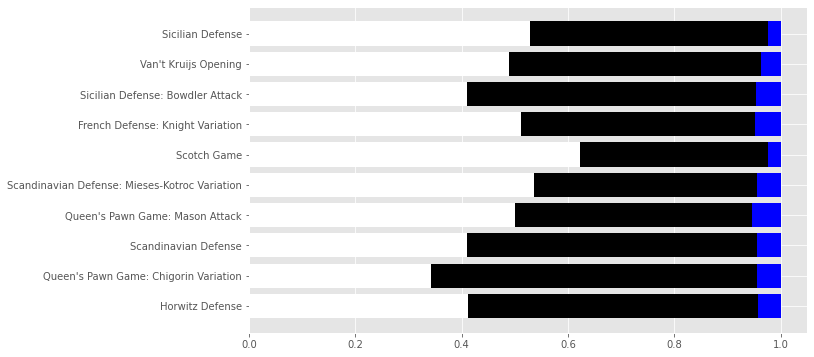

In [771]:
#need to update labels and format
fig, ax = plt.subplots(1,1, figsize = (10,6))
x_pos = [i for i in reversed(openings_df.index[0:10])]
wp = np.array(openings_df['white_percent'][0:10])
bp = np.array(openings_df['black_percent'][0:10])
dp = np.array(openings_df['draw_percent'][0:10])
ax.barh(x_pos, wp, color = 'white')
ax.barh(x_pos, bp, color = 'black', left = wp)
ax.barh(x_pos, dp, color = 'blue', left = wp + bp)


In [787]:
df['moves'][0:5]

['d4',
 'd5',
 'c4',
 'c6',
 'cxd5',
 'e6',
 'dxe6',
 'fxe6',
 'Nf3',
 'Bb4+',
 'Nc3',
 'Ba5',
 'Bf4']

In [779]:
for i, l in enumerate(df['moves'][0:10]):
    print(type(l))

<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>


In [780]:
def moves_1d(series):
    return pd.Series([x for _list in series for x in _list])

In [785]:
moves = moves_1d(df['moves']).value_counts()

In [786]:
moves[0:10]

O-O    22312
Nf3    18429
e4     17481
Nf6    16520
d4     16214
e5     16002
Nc6    14440
d5     14398
Nc3    14004
c5     10042
dtype: int64

In [798]:
moves_df = df[['id', 'winner', 'turns', 'moves']].copy()

In [833]:
moves_df['turns'].max(), moves_df['turns'].min()

(349, 1)

In [801]:
moves_df.head(10)

,id,winner,turns,moves
0,TZJHLljE,white,13,"[d4, d5, c4, c6, cxd5, e6, dxe6, fxe6, Nf3, Bb..."
1,l1NXvwaE,black,16,"[d4, Nc6, e4, e5, f4, f6, dxe5, fxe5, fxe5, Nx..."
2,mIICvQHh,white,61,"[e4, e5, d3, d6, Be3, c6, Be2, b5, Nd2, a5, a4..."
3,kWKvrqYL,white,61,"[d4, d5, Nf3, Bf5, Nc3, Nf6, Bf4, Ng4, e3, Nc6..."
4,9tXo1AUZ,white,95,"[e4, e5, Nf3, d6, d4, Nc6, d5, Nb4, a3, Na6, N..."
5,MsoDV9wj,draw,5,"[e4, c5, Nf3, Qa5, a3]"
6,qwU9rasv,white,33,"[d4, d5, e4, dxe4, Nc3, Nf6, f3, exf3, Nxf3, N..."
7,RVN0N3VK,black,9,"[e4, Nc6, d4, e5, d5, Nce7, c3, Ng6, b4]"
8,dwF3DJHO,black,66,"[e4, e5, Bc4, Nc6, Nf3, Nd4, d3, Nxf3+, Qxf3, ..."
9,afoMwnLg,white,119,"[e4, d5, exd5, Qxd5, Nc3, Qe5+, Be2, Na6, d4, ..."


In [818]:
#first move
moves_df['moves'][0:10]

0    [d4, d5, c4, c6, cxd5, e6, dxe6, fxe6, Nf3, Bb...
1    [d4, Nc6, e4, e5, f4, f6, dxe5, fxe5, fxe5, Nx...
2    [e4, e5, d3, d6, Be3, c6, Be2, b5, Nd2, a5, a4...
3    [d4, d5, Nf3, Bf5, Nc3, Nf6, Bf4, Ng4, e3, Nc6...
4    [e4, e5, Nf3, d6, d4, Nc6, d5, Nb4, a3, Na6, N...
5                               [e4, c5, Nf3, Qa5, a3]
6    [d4, d5, e4, dxe4, Nc3, Nf6, f3, exf3, Nxf3, N...
7             [e4, Nc6, d4, e5, d5, Nce7, c3, Ng6, b4]
8    [e4, e5, Bc4, Nc6, Nf3, Nd4, d3, Nxf3+, Qxf3, ...
9    [e4, d5, exd5, Qxd5, Nc3, Qe5+, Be2, Na6, d4, ...
Name: moves, dtype: object

In [835]:
moves_df['first_move'] = moves_df['moves'].map(lambda x: x[0])
moves_df['second_move'] = moves_df['moves'].map(lambda x: x[1] if len(x) > 2 else None)

In [836]:
moves_df.head(10)

,id,winner,turns,moves,first_move,second_move
0,TZJHLljE,white,13,"[d4, d5, c4, c6, cxd5, e6, dxe6, fxe6, Nf3, Bb...",d4,d5
1,l1NXvwaE,black,16,"[d4, Nc6, e4, e5, f4, f6, dxe5, fxe5, fxe5, Nx...",d4,Nc6
2,mIICvQHh,white,61,"[e4, e5, d3, d6, Be3, c6, Be2, b5, Nd2, a5, a4...",e4,e5
3,kWKvrqYL,white,61,"[d4, d5, Nf3, Bf5, Nc3, Nf6, Bf4, Ng4, e3, Nc6...",d4,d5
4,9tXo1AUZ,white,95,"[e4, e5, Nf3, d6, d4, Nc6, d5, Nb4, a3, Na6, N...",e4,e5
5,MsoDV9wj,draw,5,"[e4, c5, Nf3, Qa5, a3]",e4,c5
6,qwU9rasv,white,33,"[d4, d5, e4, dxe4, Nc3, Nf6, f3, exf3, Nxf3, N...",d4,d5
7,RVN0N3VK,black,9,"[e4, Nc6, d4, e5, d5, Nce7, c3, Ng6, b4]",e4,Nc6
8,dwF3DJHO,black,66,"[e4, e5, Bc4, Nc6, Nf3, Nd4, d3, Nxf3+, Qxf3, ...",e4,e5
9,afoMwnLg,white,119,"[e4, d5, exd5, Qxd5, Nc3, Qe5+, Be2, Na6, d4, ...",e4,d5


In [840]:
moves_df[moves_df['turns'] == 1].count()

id             17
winner         17
turns          17
moves          17
first_move     17
second_move     0
dtype: int64

In [845]:
drop_names = moves_df[moves_df['turns'] <= 1].index

In [846]:
drop_names

Int64Index([ 1946,  1977,  4115,  4473,  4828,  5496,  5875,  6040,  9229,
            11742, 11963, 12679, 13557, 13560, 13701, 14117, 18583],
           dtype='int64')

In [847]:
moves_df.shape

(19113, 6)

In [848]:
moves_df.drop(drop_names, inplace = True)

In [849]:
moves_df.shape

(19096, 6)

In [850]:
19113 - 19096

17

In [851]:
moves_df.head(10)

,id,winner,turns,moves,first_move,second_move
0,TZJHLljE,white,13,"[d4, d5, c4, c6, cxd5, e6, dxe6, fxe6, Nf3, Bb...",d4,d5
1,l1NXvwaE,black,16,"[d4, Nc6, e4, e5, f4, f6, dxe5, fxe5, fxe5, Nx...",d4,Nc6
2,mIICvQHh,white,61,"[e4, e5, d3, d6, Be3, c6, Be2, b5, Nd2, a5, a4...",e4,e5
3,kWKvrqYL,white,61,"[d4, d5, Nf3, Bf5, Nc3, Nf6, Bf4, Ng4, e3, Nc6...",d4,d5
4,9tXo1AUZ,white,95,"[e4, e5, Nf3, d6, d4, Nc6, d5, Nb4, a3, Na6, N...",e4,e5
5,MsoDV9wj,draw,5,"[e4, c5, Nf3, Qa5, a3]",e4,c5
6,qwU9rasv,white,33,"[d4, d5, e4, dxe4, Nc3, Nf6, f3, exf3, Nxf3, N...",d4,d5
7,RVN0N3VK,black,9,"[e4, Nc6, d4, e5, d5, Nce7, c3, Ng6, b4]",e4,Nc6
8,dwF3DJHO,black,66,"[e4, e5, Bc4, Nc6, Nf3, Nd4, d3, Nxf3+, Qxf3, ...",e4,e5
9,afoMwnLg,white,119,"[e4, d5, exd5, Qxd5, Nc3, Qe5+, Be2, Na6, d4, ...",e4,d5


In [868]:
moves_grouped = moves_df.groupby(['first_move', 'winner'])['id'].count()
moves_grouped = pd.DataFrame(moves_grouped).reset_index()
moves_grouped = moves_grouped.pivot(index = 'first_move', columns = 'winner', values = 'id')
moves_grouped['total_count'] = moves_grouped['black'] + moves_grouped['white'] + moves_grouped['draw']

In [869]:
moves_grouped.sort_values(by = 'total_count', ascending = False).head(20)

winner,black,draw,white,total_count
first_move,,,,
e4,5380.0,550.0,6051.0,11981.0
d4,1970.0,209.0,2181.0,4360.0
c4,292.0,28.0,372.0,692.0
Nf3,268.0,42.0,341.0,651.0
e3,235.0,18.0,133.0,386.0
b3,82.0,7.0,79.0,168.0
g3,86.0,4.0,77.0,167.0
f4,74.0,14.0,66.0,154.0
d3,77.0,2.0,48.0,127.0
